<a href="https://colab.research.google.com/github/Sunday-Okey/Pandas_Lesson_Colab/blob/main/Pandas_Series_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pandas Series Methods

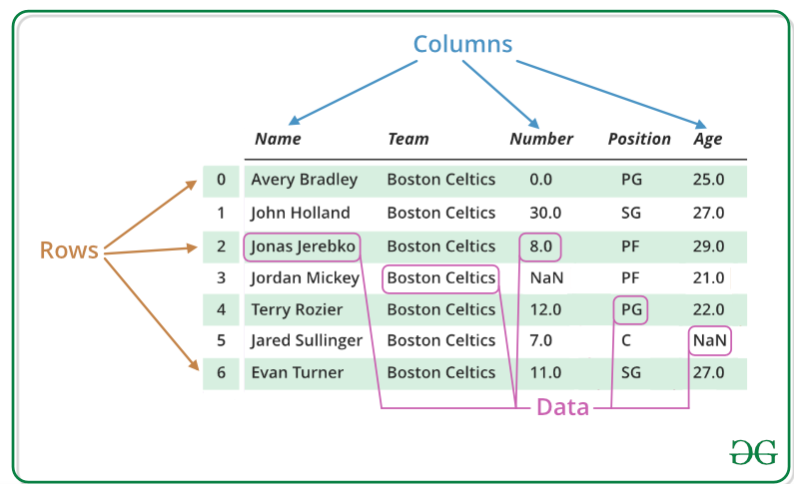

In [3]:
import pandas as pd
import numpy as np
import os


In [17]:
# Download the data
import urllib.request
datapath = os.path.join("data", "")
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/paskhaver/pandas-in-action/master"
os.makedirs(datapath, exist_ok=True)
for filename in ("google_stocks.csv", "pokemon.csv", "revolutionary_war.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "/chapter_03_series_methods/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

To force pandas to use a Series, we need to add another parameter called squeeze and pass it an argument of True. The squeeze parameter coerces a one-column DataFrame into a Series:

In [37]:
pokemon = pd.read_csv(datapath + 'pokemon.csv', index_col='Pokemon', squeeze=True)
type(pokemon)

pandas.core.series.Series

In [39]:
pokemon

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

The remaining two data sets carry some additional complexity. Let’s take a peek at google_stock.csv:

In [60]:
google = pd.read_csv(datapath + "google_stocks.csv", parse_dates=['Date'], index_col='Date', squeeze=True)
google

Date
2004-08-19      49.98
2004-08-20      53.95
2004-08-23      54.50
2004-08-24      52.24
2004-08-25      52.80
               ...   
2019-10-21    1246.15
2019-10-22    1242.80
2019-10-23    1259.13
2019-10-24    1260.99
2019-10-25    1265.13
Name: Close, Length: 3824, dtype: float64

In [61]:
google.dtypes

dtype('float64')

By default, the read_csv function imports all columns from a CSV. We’ll have to limit the import to two columns if we want a Series: one column for the index and the other for the values. The squeeze parameter by itself is insufficient in this scenario; pandas will ignore the parameter if there is more than one column of data.

The read_csv function’s usecols parameter accepts a list of columns that pandas should import. Let’s include only Start Date and State:

In [59]:
battles = pd.read_csv(datapath + 'revolutionary_war.csv', parse_dates =['Start Date'],index_col='Start Date', usecols=['State', 'Start Date'], squeeze=True)
battles.head()

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
Name: State, dtype: object

Now that we’ve imported our data sets into Series objects, let’s see what we can do with them.

##Sorting a Series

Sorting by values with the sort_values method

Suppose that we’re curious about the lowest and highest stock prices that Google has had. The sort_values method returns a new Series with the values sorted in ascending order. Ascending means increasing in size—in other words, smallest to greatest. The index labels move with their value counterparts:

In [62]:
google.sort_values()

Date
2004-09-03      49.82
2004-09-01      49.94
2004-08-19      49.98
2004-09-02      50.57
2004-09-07      50.60
               ...   
2019-04-23    1264.55
2019-10-25    1265.13
2018-07-26    1268.33
2019-04-26    1272.18
2019-04-29    1287.58
Name: Close, Length: 3824, dtype: float64

In [63]:
pokemon.sort_values()

Pokemon
Illumise                Bug
Silcoon                 Bug
Pinsir                  Bug
Burmy                   Bug
Wurmple                 Bug
                  ...      
Tirtouga       Water / Rock
Relicanth      Water / Rock
Corsola        Water / Rock
Carracosta     Water / Rock
Empoleon      Water / Steel
Name: Type, Length: 809, dtype: object

In [65]:
google.sort_values(ascending=False)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
               ...   
2004-09-07      50.60
2004-09-02      50.57
2004-08-19      49.98
2004-09-01      49.94
2004-09-03      49.82
Name: Close, Length: 3824, dtype: float64

A descending sort will arrange a Series of strings in reverse alphabetical order. Descending means from the end of the alphabet to the start of the alphabet:

In [66]:
pokemon.sort_values(ascending = False).head()

Pokemon
Empoleon      Water / Steel
Corsola        Water / Rock
Relicanth      Water / Rock
Carracosta     Water / Rock
Tirtouga       Water / Rock
Name: Type, dtype: object

The na_position parameter configures the placement of NaN values in the returned Series and has a default argument of "last". By default, pandas places missing values at the end of a sorted Series:

In [69]:
battles.sort_values()

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1782-08-08            NaN
1782-08-25            NaN
1782-09-13            NaN
1782-10-18            NaN
1782-12-06            NaN
Name: State, Length: 232, dtype: object

In [70]:
battles.sort_values(na_position = "last")

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1782-08-08            NaN
1782-08-25            NaN
1782-09-13            NaN
1782-10-18            NaN
1782-12-06            NaN
Name: State, Length: 232, dtype: object

To display the missing values first, pass the na_position parameter an argument of "first". The resulting Series shows all NaNs first, followed by the sorted values:

In [71]:
battles.sort_values(na_position = "first")

Start Date
1775-09-17         NaN
1775-12-31         NaN
1776-03-03         NaN
1776-03-25         NaN
1776-05-18         NaN
                ...   
1781-07-06    Virginia
1781-07-01    Virginia
1781-06-26    Virginia
1781-04-25    Virginia
1783-01-22    Virginia
Name: State, Length: 232, dtype: object

What if we wanted to remove NaN values? The dropna method returns a Series with all missing values removed. Note that the method targets only NaNs in the Series’ values, not the index. The next example filters our battles to those with a present location

In [73]:
battles.dropna().sort_values()

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1781-07-06       Virginia
1781-07-01       Virginia
1781-06-26       Virginia
1781-04-25       Virginia
1783-01-22       Virginia
Name: State, Length: 162, dtype: object

##Sorting by index with the sort_index method

Sometimes, our area of focus may lie in the index rather than the values. Luckily, we can sort a Series by index as well with the sort_index method. With this option, the values move alongside their index counterparts. Like sort_values, sort_index accepts an ascending parameter, and its default argument is also True:

In [75]:
pokemon.head()

Pokemon
Bulbasaur     Grass / Poison
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [77]:
pokemon.sort_index(ascending=False)

Pokemon
Zygarde      Dragon / Ground
Zweilous       Dark / Dragon
Zubat        Poison / Flying
Zorua                   Dark
Zoroark                 Dark
                  ...       
Aegislash      Steel / Ghost
Accelgor                 Bug
Absol                   Dark
Abra                 Psychic
Abomasnow        Grass / Ice
Name: Type, Length: 809, dtype: object

When sorting a collection of datetimes in ascending order, pandas sorts from the earliest date to the latest. The battles Series offers a great opportunity to see this sort in action:

In [78]:
battles.sort_index()

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
                  ...      
1783-01-22         Virginia
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

We see a new type of value toward the end of the sorted Series. Pandas uses another NumPy object, NaT, in place of missing date values (NaT stands for not a time). The NaT object maintains data integrity with the index’s datetime type.

The sort_index method also includes the na_position parameter for altering the placement of NaN values. The next example displays the missing values first, followed by the sorted datetimes:

In [80]:
battles.sort_index(na_position='first')

Start Date
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
1774-09-01    Massachusetts
                  ...      
1782-09-11         Virginia
1782-09-13              NaN
1782-10-18              NaN
1782-12-06              NaN
1783-01-22         Virginia
Name: State, Length: 232, dtype: object

To sort in descending order, we can pass the ascending parameter an argument of False. A descending sort displays dates from latest to earliest:

In [81]:
battles.sort_index(ascending=False)

Start Date
1783-01-22         Virginia
1782-12-06              NaN
1782-10-18              NaN
1782-09-13              NaN
1782-09-11         Virginia
                  ...      
1774-09-01    Massachusetts
NaT              New Jersey
NaT                Virginia
NaT                     NaN
NaT                     NaN
Name: State, Length: 232, dtype: object

The data set’s earliest battle took place on January 22, 1783, in Virginia.

### Retrieving the smallest and largest values with the nsmallest and nlargest methods

Suppose that we wanted to find the five dates on which Google’s stock performed best. One option is to sort the Series in descending order and then limit the results to the first five rows:

In [87]:
google.sort_values(ascending=False).head()

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
Name: Close, dtype: float64

The operation is fairly common, so pandas offers a helper method to save us a few characters. The nlargest method returns the largest values from a Series. Its first parameter, n, sets the number of records to return. The n parameter has a default argument of 5. Pandas sorts the values in descending order in the returned Series:

In [88]:
#This achieves the same result as the above
google.nlargest()

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
Name: Close, dtype: float64

The complementary nsmallest method returns the smallest values from a Series, sorted in ascending order. Its n parameter also has a default argument of 5:

In [86]:
google.nsmallest()

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
Name: Close, dtype: float64

Note that neither of these methods works on Series of strings.